In [27]:
#### from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [28]:
# import the data
data = pd.read_csv("FuelConsumption.csv")

In [41]:
data.head(-5)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1057,VOLVO,S60 AWD,COMPACT,2.5,5,AS6,X,11.6,8.3,10.1,28,232
1058,VOLVO,S60 AWD,COMPACT,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1059,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
1060,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [31]:
data.isnull().sum()/data.shape[0]*100

MODELYEAR                   0.0
MAKE                        0.0
MODEL                       0.0
VEHICLECLASS                0.0
ENGINESIZE                  0.0
CYLINDERS                   0.0
TRANSMISSION                0.0
FUELTYPE                    0.0
FUELCONSUMPTION_CITY        0.0
FUELCONSUMPTION_HWY         0.0
FUELCONSUMPTION_COMB        0.0
FUELCONSUMPTION_COMB_MPG    0.0
CO2EMISSIONS                0.0
dtype: float64

In [32]:
data.duplicated().sum()

0

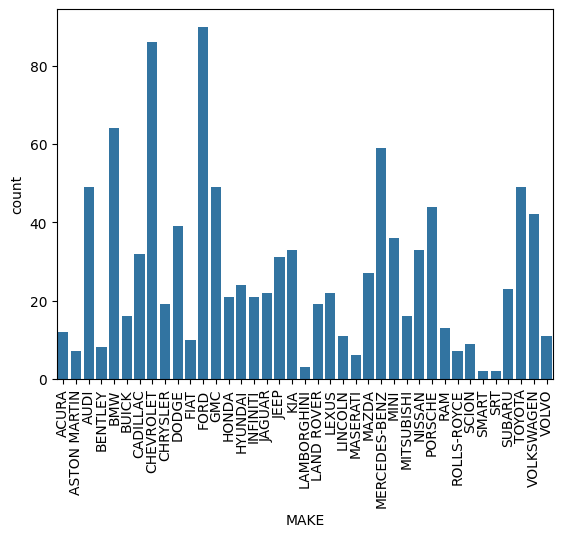

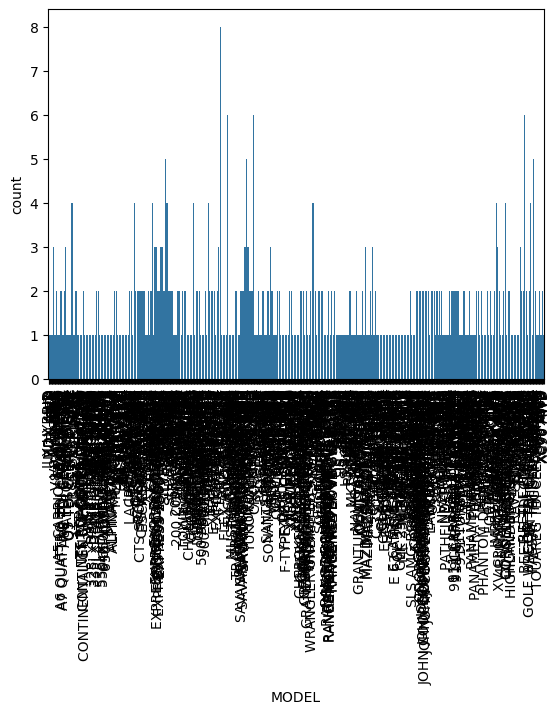

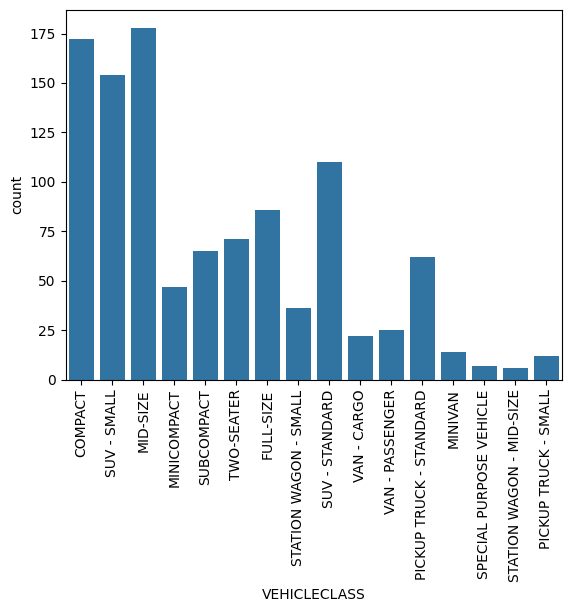

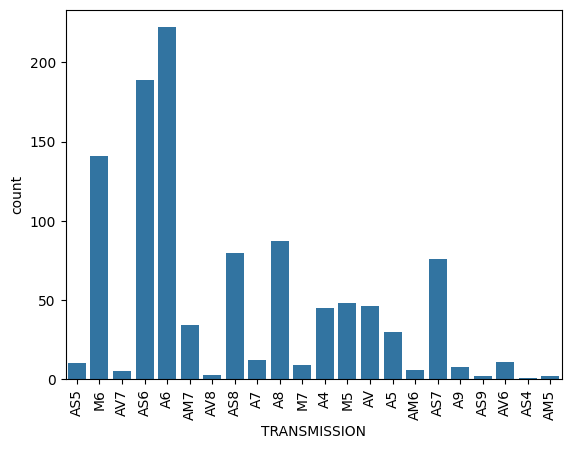

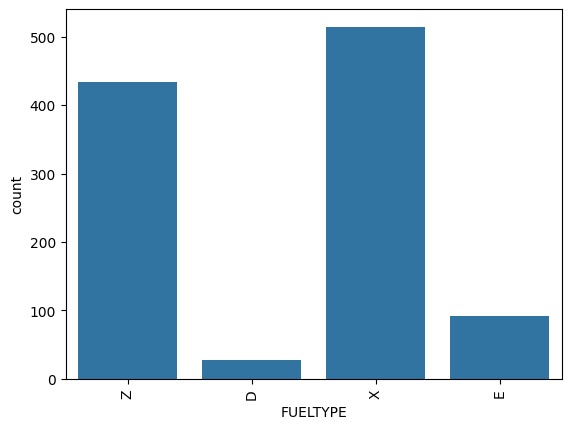

In [44]:
cat = data.select_dtypes(include="object").columns.tolist()
for i in cat:
    sns.countplot(data=data,x=data[i])
    plt.xticks(rotation=90)
    plt.show()

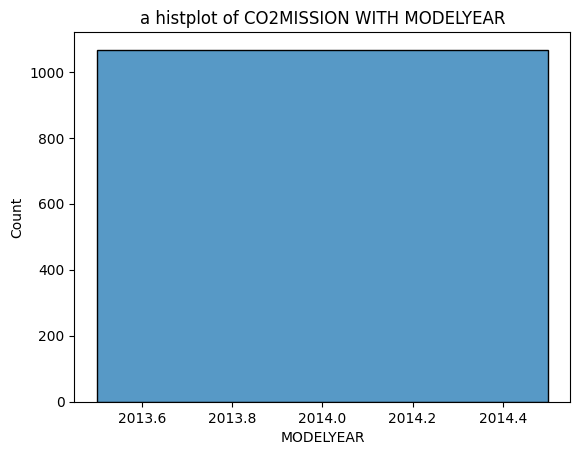

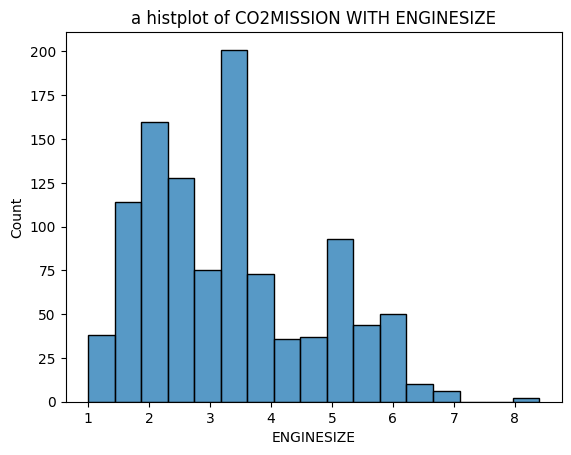

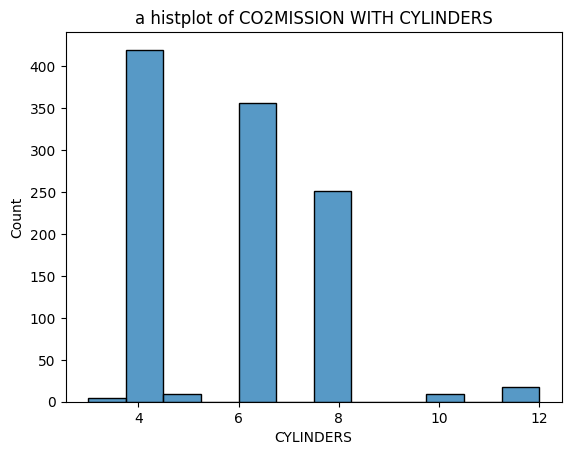

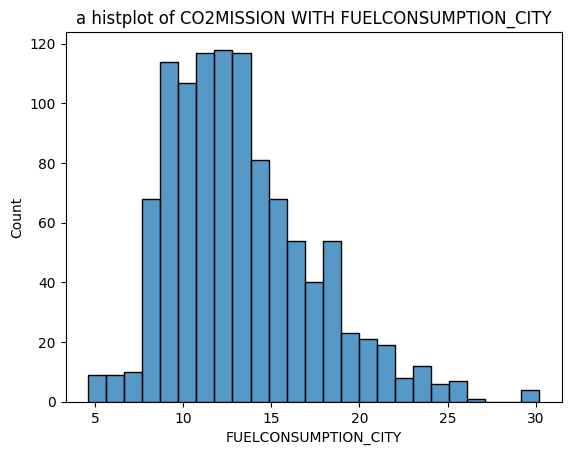

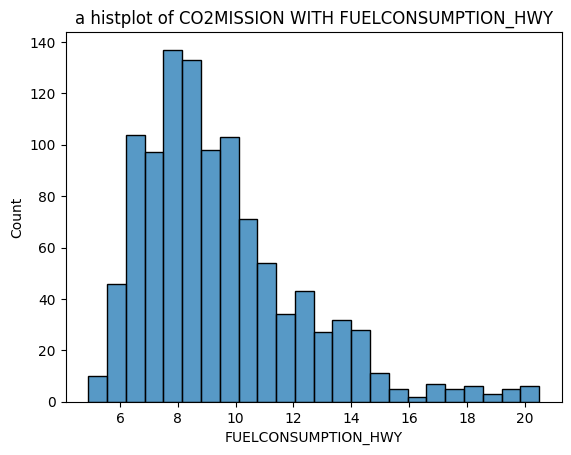

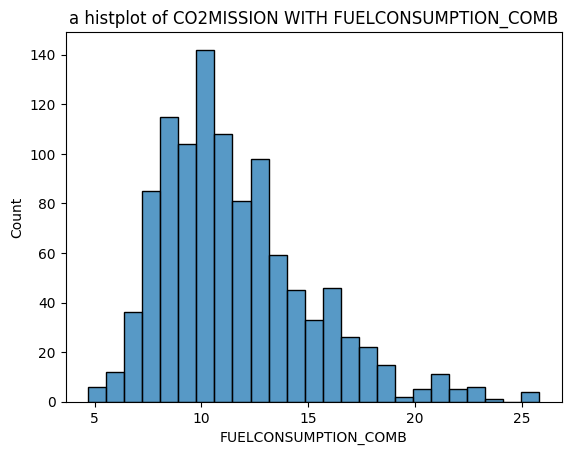

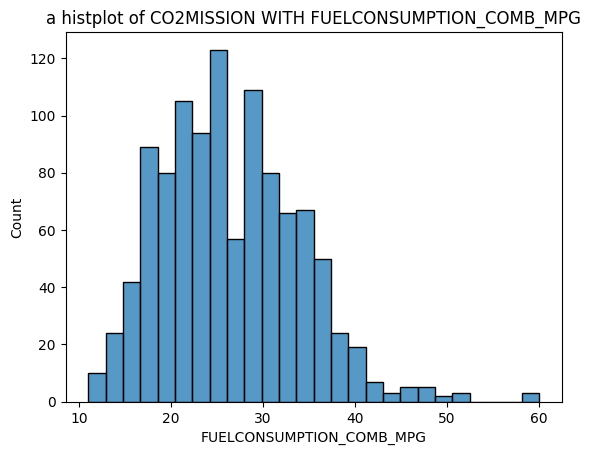

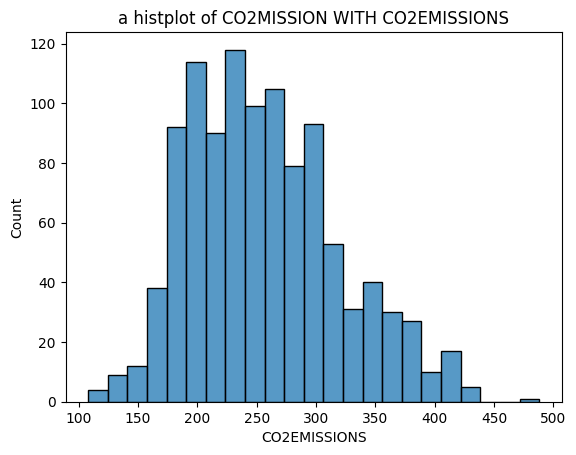

In [33]:
#plot a hist plot for the CO2 Emission with various variables
num_cols = data.select_dtypes(include='number').columns
for col in num_cols:
    sns.histplot(data=data,x=col)
    plt.title(f"a histplot of CO2MISSION WITH {col}")
    plt.show()

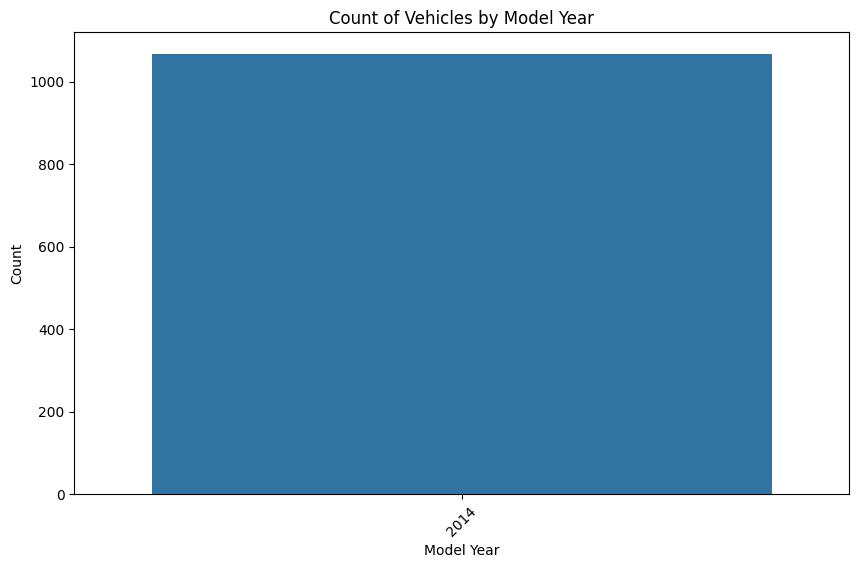

In [34]:

# Plot 1: Count of vehicles by model year
plt.figure(figsize=(10, 6))
sns.countplot(x='MODELYEAR', data=data)
plt.title('Count of Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

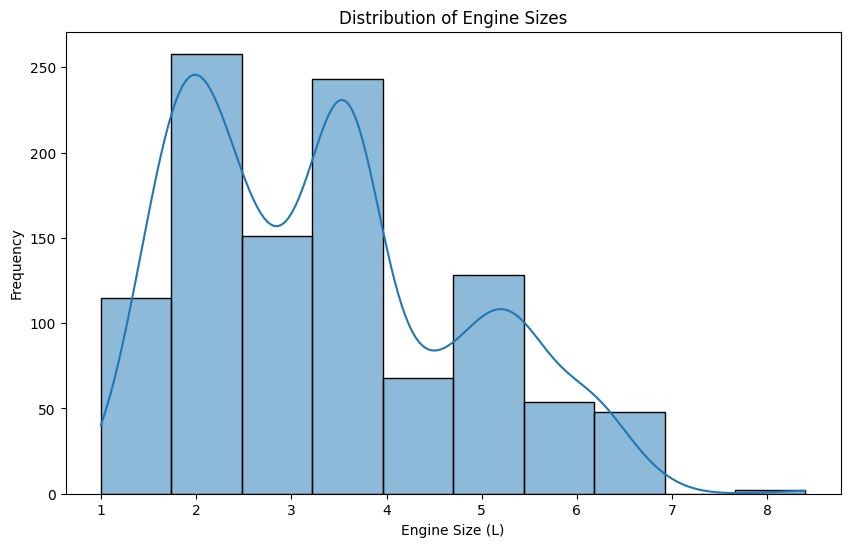

In [35]:
# Plot 2: Distribution of engine sizes
plt.figure(figsize=(10, 6))
sns.histplot(data['ENGINESIZE'], bins=10, kde=True)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')
plt.show()

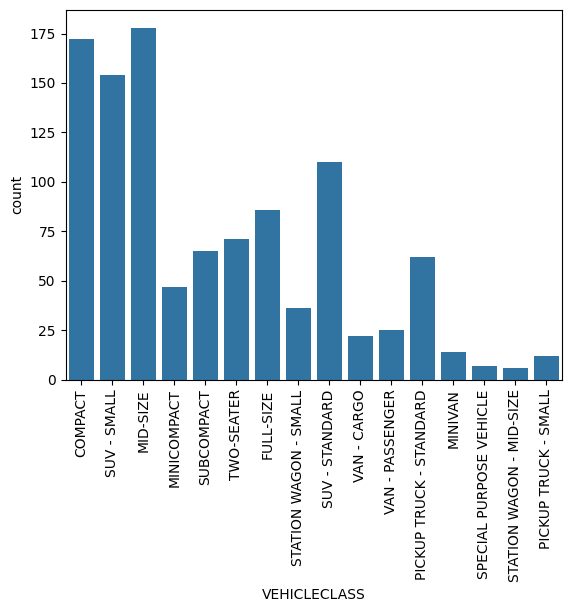

In [36]:
# count the vehicle class
sns.countplot(x='VEHICLECLASS',data=data)
plt.xticks(rotation=90)
plt.show()

In [37]:
#drop some irrelevant features
data.drop("MODELYEAR",axis=1,inplace=True)

In [40]:
data.select_dtypes(include='object').nunique()
data.drop(columns=["MAKE","MODEL",""])

MAKE             39
MODEL           663
VEHICLECLASS     16
TRANSMISSION     22
FUELTYPE          4
dtype: int64

In [48]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X.drop(columns=["MODEL","TRANSMISSION","MAKE","TRANSMISSION"],inplace=True)
X = pd.get_dummies(X,drop_first=True)
X.head()
X.shape


(1067, 24)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
#scale the data 
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [55]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,classification_report,r2_score
import warnings
warnings.filterwarnings("ignore")

preprocessor = Pipeline(
    steps=[
        ("scaler",StandardScaler(with_mean=False)),
        ("regressor",Ridge())
    ]
)
param_grid = [
     {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength for Ridge
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength for Lasso
    },
    {
        'regressor': [ElasticNet()],
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength for ElasticNet
        'regressor__l1_ratio': [0.1, 0.5, 0.9]  # Only for ElasticNet
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7],
        'regressor__subsample': [0.8, 1.0]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 10, 20]
    }
]
gridcv = GridSearchCV(preprocessor,param_grid,cv=5,
                     scoring="neg_mean_squared_error",
                      error_score='raise',
                     verbose=2)
gridcv.fit(x_train,y_train)

print(f"best parameters {gridcv.best_params_}")
print(f"best score= {gridcv.best_score_}")

y_pred = gridcv.predict(x_test)
print(f"test mse {mean_absolute_error(y_test,y_pred)}")
print(f"R2 score = {r2_score(y_test,y_pred)}")

Fitting 5 folds for each of 62 candidates, totalling 310 fits
[CV] END ............regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=1.0; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=1.0; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=1.0; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=1.0; total time=   0.0s
[CV] END ............regressor=Ridge(), regressor__alpha=1.0; total time=   0.0s
[CV] END ...........regressor=Ridge(), regressor__alpha=10.0; total time=   0.0s
[CV] END ...........regressor=Ridge(), regresso

In [61]:
results=pd.DataFrame(gridcv.cv_results_)
results.head(30)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__alpha,param_regressor__l1_ratio,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__n_estimators,param_regressor__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033980,0.012057,0.003402,1.200515e-03,Ridge(),0.1,NaN,NaN,NaN,NaN,NaN,"{'regressor': Ridge(), 'regressor__alpha': 0.1}",-62.925520,-57.425668,-0.845413,-9.852421,-191.579980,-64.525800,68.176400,37
1,0.025765,0.002734,0.002604,4.890682e-04,Ridge(),1.0,NaN,NaN,NaN,NaN,NaN,"{'regressor': Ridge(), 'regressor__alpha': 1.0}",-62.720647,-72.264495,-1.181675,-7.762651,-149.712891,-58.728472,53.640423,36
2,0.026599,0.004839,0.002604,4.889762e-04,Ridge(),10.0,NaN,NaN,NaN,NaN,NaN,"{'regressor': Ridge(), 'regressor__alpha': 10.0}",-131.013541,-140.862611,-4.335188,-14.658535,-49.633419,-68.100659,57.472545,38
3,0.023604,0.001627,0.002196,4.012995e-04,Ridge(),100.0,NaN,NaN,NaN,NaN,NaN,"{'regressor': Ridge(), 'regressor__alpha': 100.0}",-959.132610,-147.082719,-46.317703,-86.958670,-65.029564,-260.904253,350.756191,46
4,0.187009,0.063155,0.002814,4.068642e-04,Lasso(),0.1,NaN,NaN,NaN,NaN,NaN,"{'regressor': Lasso(), 'regressor__alpha': 0.1}",-1.420558,-3.546360,-0.871780,-1.776661,-1.046323,-1.732336,0.959273,1
5,0.147905,0.006167,0.002754,4.485151e-04,Lasso(),1.0,NaN,NaN,NaN,NaN,NaN,"{'regressor': Lasso(), 'regressor__alpha': 1.0}",-24.059387,-33.606336,-20.573194,-22.536107,-22.808862,-24.716777,4.583037,12
6,0.027103,0.001208,0.002488,4.530399e-04,Lasso(),10.0,NaN,NaN,NaN,NaN,NaN,"{'regressor': Lasso(), 'regressor__alpha': 10.0}",-691.173486,-487.704965,-649.867398,-565.079723,-510.936915,-580.952497,78.418313,51
7,0.016927,0.001439,0.003004,8.937936e-04,Lasso(),100.0,NaN,NaN,NaN,NaN,NaN,"{'regressor': Lasso(), 'regressor__alpha': 100.0}",-4269.719544,-3720.548179,-4512.981635,-3718.239763,-3701.216925,-3984.541209,341.015365,61
8,0.414355,0.072498,0.002803,4.073770e-04,ElasticNet(),0.1,0.1,NaN,NaN,NaN,NaN,"{'regressor': ElasticNet(), 'regressor__alpha'...",-617.944570,-125.384731,-28.469937,-52.601526,-40.691386,-173.018430,225.003637,45
9,0.210971,0.037573,0.003212,7.466639e-04,ElasticNet(),0.1,0.5,NaN,NaN,NaN,NaN,"{'regressor': ElasticNet(), 'regressor__alpha'...",-157.422056,-23.989063,-15.993225,-22.977547,-32.855021,-50.647383,53.655560,34


In [58]:
results=results[["param_C","param_kernel","mean_test_score"]]

KeyError: "['param_C', 'param_kernel'] not in index"